In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
X, y = datasets.make_regression(
                                n_samples=20,
                                n_features=3)

NameError: ignored

In [26]:
X

array([[-0.72978215,  0.21558231,  1.0925326 ],
       [ 0.66138937, -0.02842594, -0.84376356],
       [ 1.45753274,  1.00478686,  0.86012963],
       [-0.44190534,  0.77755327,  1.53090218],
       [-1.36469846,  0.25598459, -1.39674813],
       [-0.79961879, -1.2021951 ,  0.87535833],
       [-0.52495711,  1.35242693,  0.39433551],
       [ 0.87725714, -0.77460821, -0.12174026],
       [ 0.09479623, -1.21191475,  0.39767287],
       [-2.45801399,  1.16533679, -1.61191268],
       [-0.50251373,  0.12331963, -0.06801869],
       [ 0.08739654,  1.059998  ,  0.36208697],
       [-0.20571603,  0.79331304, -0.3212157 ],
       [-0.75635779, -0.22808587, -0.32971376],
       [ 2.27553316,  0.63628785, -0.35886944],
       [-0.75331725,  0.63473363, -0.21345687],
       [-0.2014052 ,  0.65088215,  0.18476166],
       [ 0.74476651, -0.91049755, -0.22454967],
       [ 0.48217103,  0.74556964, -0.63325153],
       [-1.16318045,  0.15516833,  0.05454113]])

<Axes: >

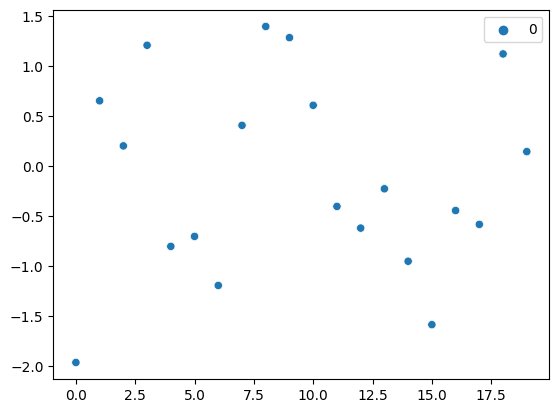

In [20]:
sns.scatterplot(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
y_test.shape

(25,)

In [ ]:
class LinearRegression:
    def __init__(self, learning_rate = 0.1, tollerance = 0.01):
        # tollerance - правило оставновки. допуск на изменение качества модели
        # weigths - хранение весов модели
        # score - качество модели

        self.learning_rate = learning_rate
        self.tollerance = tollerance
        self.weigths = []
        self.score = []

    def r2(self, predict, y):
        return 1 - np.sum((predict - y )**2) / np.sum((y.mean() - y)**2)

    def fit(self, X, y):

        X = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
        n_samples, n_features = X.shape
        self.weigths = np.zeros(n_features)

        key = True

        while key:
            indexes = np.random.choice(n_features, int(0.5*n_features), replace=False)
            predict = X.dot(self.weigths)
            error = predict - y
            dw = 2 / n_samples * X[:,indexes].T.dot(error)
            self.weigths[indexes] -= dw * self.learning_rate
            self.score.append(self.r2(predict, y))

            if len(self.score) > n_features and self.score[-1] - self.score[n_features] < self.tollerance:
                key = False

    def predict(self, X):
        X = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
        return X.dot(self.weigths)


In [ ]:
reg1 = LinearRegression()
reg1.fit(X_train, y_train)

0.02491640076113799
0.3888057358026993
0.5387238280631518


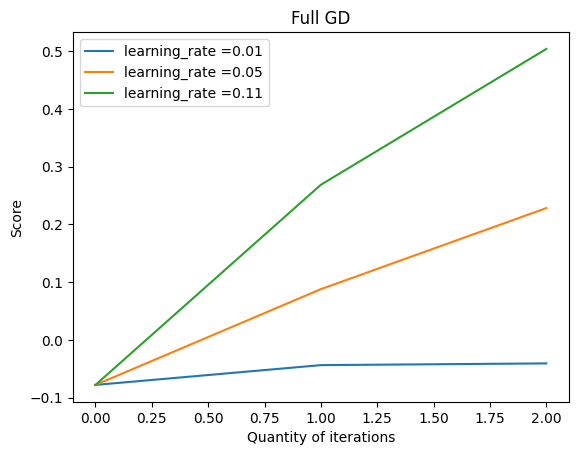

In [ ]:
for i in (0.01, 0.05, 0.11):
    reg1 = LinearRegression(learning_rate=i)
    reg1.fit(X_train, y_train)

    plt.plot(reg1.score, label='learning_rate ='+str(i))

    predict = reg1.predict(X_test)
    print(reg1.r2(predict, y_test))

plt.title("Full GD")
plt.legend()
plt.xlabel('Quantity of iterations')
plt.ylabel('Score')
plt.show()

0.05511135122964994
0.15174710174026584
0.6848293959574827


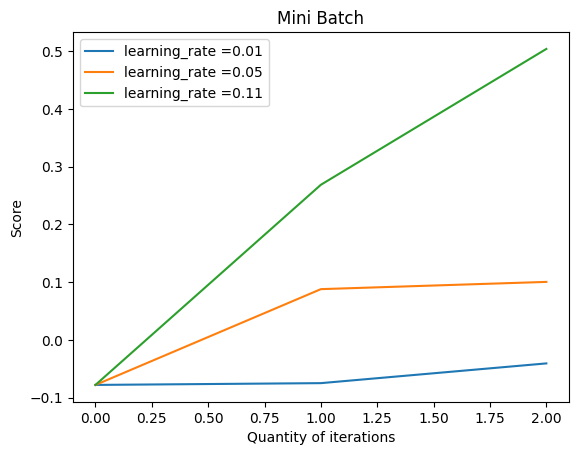

In [ ]:
for i in (0.01, 0.05, 0.11):
    reg1 = LinearRegression(learning_rate=i)
    reg1.fit(X_train, y_train)

    plt.plot(reg1.score, label='learning_rate ='+str(i))

    predict = reg1.predict(X_test)
    print(reg1.r2(predict, y_test))

plt.title("Mini Batch")
plt.legend()
plt.xlabel('Quantity of iterations')
plt.ylabel('Score')
plt.show()